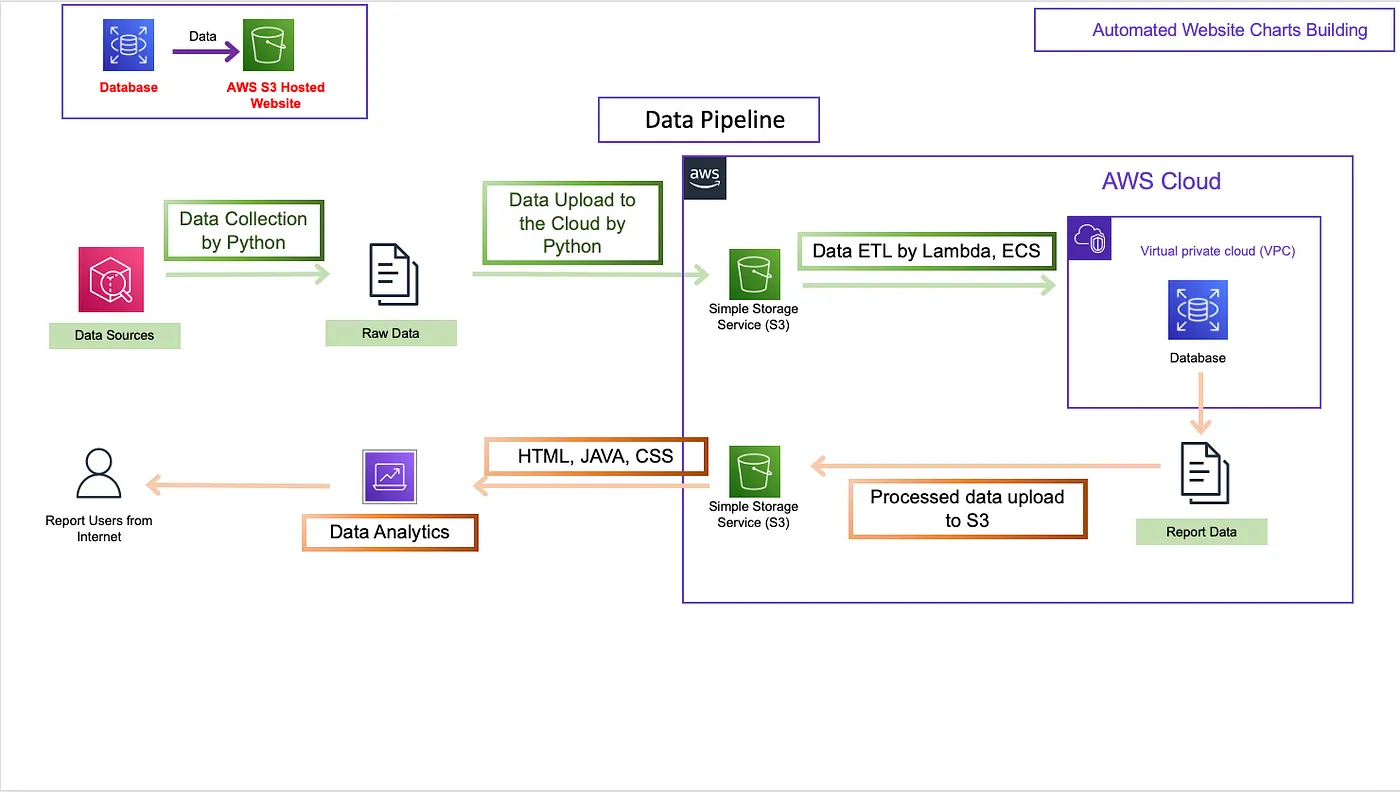

s3

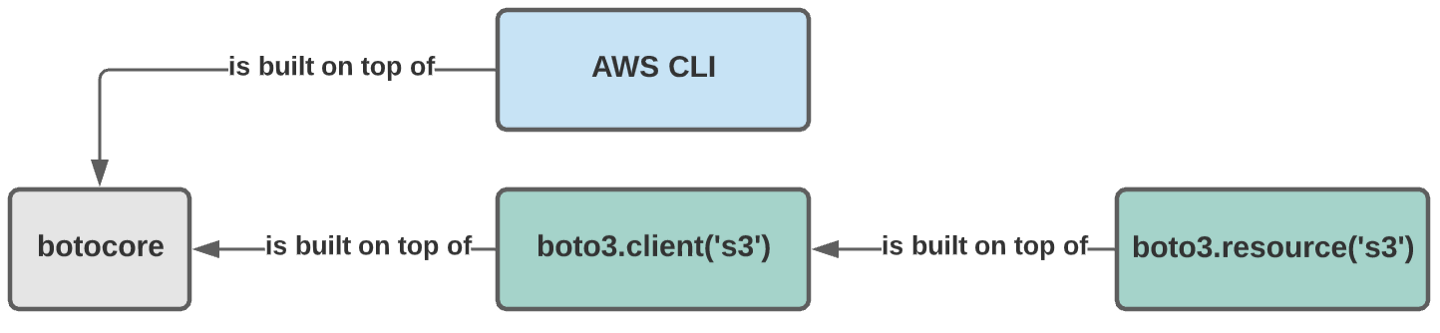

In [ ]:
# Import the necessary packages
import boto3
# Now, build a client
s3 = boto3.client(
    's3',
    aws_access_key_id = 'enter your_aws_access_key_id ',
    aws_secret_access_key = ' enter your_aws_secret_access_key ',
    region_name = ' enter your_aws_region_name '
)

my_bucket = "enter your s3 bucket name that has to be created"
bucket = s3.create_bucket(
ACL='private',
Bucket= my_bucket
)

bucket_response = s3.list_buckets()
# Output the bucket names
print('Existing buckets are:')
for bucket in bucket_response['Buckets']:
    print(f'  {bucket["Name"]}')


my_bucket = "enter your s3 bucket name that has to be deleted"
response = s3.delete_bucket(Bucket= my_bucket)
print("Bucket has been deleted successfully !!!")

my_bucket = "enter your s3 bucket name from which objects or files has to be listed out"
response = s3.list_objects(Bucket= my_bucket,
                           MaxKeys=10, 
                           Preffix="only_files_starting_with_this_string")

s3 = boto3.client("s3")
my_bucket = " enter your s3 bucket name from which objects or files has to be listed out "
response = s3.list_objects_v2(Bucket=my_bucket)
files = response.get("Contents")
for file in files:
    print(f"file_name: {file['Key']}, size: {file['Size']}")


my_bucket = "enter your bucket name to which files has to be uploaded"
file_name = "enter your file path name to be uploaded"
key_name = "enter unique identifier"
s3.upload_file(Filename= file_name, Bucket= my_bucket, Key= key_name)

my_bucket = "enter your s3 bucket name from which object or files has to be downloaded"
file_name = "enter file to be downloaded"
key_name = "enter unique identifier"
s3.download_file(Filename= file_name, Bucket= my_bucket, Key= key_name)

my_bucket = "enter your s3 bucket name from which objects or files has to be deleted"
key_name = "enter unique identifier"
s3.delete_object(Bucket= my_bucket, Key= key_name)

my_bucket = "enter your s3 bucket name from which objects or file's metadata has to be obtained"
key_name = "enter unique identifier"
response = s3.head_object(Bucket= my_bucket, Key= key_name)

In [ ]:
import requests
import os
from datetime import date
import subprocess
URL="https://www150.statcan.gc.ca/n1/dai-quo/ssi/homepage/ind-all.json"
# get the data file URL
# Canada Statistics provides the URL for data files
s3_bucket="here is the name of bucket"
# get the name for upload s3 bucket 
data_folder_path='here is the folder name '

response = requests.get(URL, allow_redirects=True)

# next is to save the file in today's folder under the main folder of 'data'
# 1) to find today's date
today=date.today()  # the format is 2023-07-28
# 2) to get today's folder file path
today_folder="./data/{}".format(today)
    # 2.1) to check today's folder exists or not 
if os.path.isdir(today_folder):
    today_folder_exists=1
    # folder already exists
else:
    today_folder_exists=0
    # 2.2) to create today's folder
    os.makedirs(today_folder)

# 3) to get file name from the URL
    # 3.1) to find the last '/' in the URL
position=URL.rfind('/') # it shows the number of the position where the last '/' is 
print(position)
    # 3.2) to get the file name
file_name=URL[position+1:]

# 4) to get the file path
file_path=today_folder + '/'+file_name

# 5) to save the file in the path created just now
open(file_path, 'wb').write(response.content)

# next is to upload the latest data files to s3 in the cloud using AWS CLI
# 6) to get the absolute file path
absolute_path=os.path.abspath(file_path)

# 7) to upload the file to s3 bucket under the foler of data/today's date/
# the AWS CLI is like : aws s3 cp "/Users/.../data/2023-07-28/ind-all.json" s3://.../data/2023-07-28/

# 7.1) to construct command:
command='aws s3 cp "{}" s3://{}/{}/{}/'.format(absolute_path,s3_bucket,data_folder_path,today)

# 7.2) to execute the command in python
process=subprocess.run(command,shell=True)
# after the file is uploaded into s3 in the cloud, lambda will be invoked and work on data processing
# the data will go through ETL to its destination in the database (for this project).
# The report data will be calculated and saved in the s3 where the website hosts. Charts on the website will be updated with the latest data. 

sqlite

In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('example.db')

# Create a cursor object
cur = conn.cursor()

# Execute a SQL command
cur.execute("SELECT * FROM users")

# Fetch data from the cursor
data = cur.fetchall()

# Print the data
print(data) 

mysql

In [ ]:
import mysql.connector

# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    user="username",
    password="password",
    database="database_name"
)

# Create a cursor object
cur = conn.cursor()

# Execute a SQL command
cur.execute("SELECT * FROM users")

# Fetch data from the cursor
data = cur.fetchall()

# Print the data
print(data) 

postgresql

In [ ]:
import psycopg2

# Connect to the database
conn = psycopg2.connect(
    host="localhost",
    database="database_name",
    user="username",
    password="password"
)

# Create a cursor object
cur = conn.cursor()

# Execute a SQL command
cur.execute("SELECT * FROM users")

# Fetch data from the cursor
data = cur.fetchall()

# Print the data
print(data) 

mongodb.

In [ ]:
import pymongo

# Connect to the database
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the database
db = client["database_name"]

# Select the collection
col = db["collection_name"]

# Find all documents in the collection
data = col.find()

# Print the data
for item in data:
    print(item) 